In [3]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

import matplotlib.pyplot as plt
import IPython
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X = np.load("../data/Train/X.npy")
Y = np.load("../data/Y.npy")

In [5]:
X_train = X[:21000]
Y_train = Y[:21000]

X_test = X[21000:]
Y_test = Y[21000:]

In [6]:
# pre-processing: divide by max and substract mean
scale = np.max(X)
X_train /= scale
X_test /= scale

mean = np.std(X)
X_train -= mean
X_test -= mean

input_dim = X.shape[1]
nb_classes = Y.shape[1]

In [7]:
# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(512, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])


In [9]:
print("Training...")
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=2)

Training...
Train on 18900 samples, validate on 2100 samples
Epoch 1/10
 - 7s - loss: 0.0834 - acc: 0.9795 - val_loss: 0.0707 - val_acc: 0.9818
Epoch 2/10
 - 6s - loss: 0.0706 - acc: 0.9817 - val_loss: 0.0675 - val_acc: 0.9820
Epoch 3/10
 - 6s - loss: 0.0676 - acc: 0.9818 - val_loss: 0.0659 - val_acc: 0.9820
Epoch 4/10
 - 6s - loss: 0.0660 - acc: 0.9819 - val_loss: 0.0644 - val_acc: 0.9822
Epoch 5/10
 - 7s - loss: 0.0651 - acc: 0.9819 - val_loss: 0.0650 - val_acc: 0.9822
Epoch 6/10
 - 7s - loss: 0.0641 - acc: 0.9820 - val_loss: 0.0636 - val_acc: 0.9825
Epoch 7/10
 - 8s - loss: 0.0633 - acc: 0.9821 - val_loss: 0.0628 - val_acc: 0.9823
Epoch 8/10
 - 9s - loss: 0.0631 - acc: 0.9822 - val_loss: 0.0628 - val_acc: 0.9823
Epoch 9/10
 - 7s - loss: 0.0626 - acc: 0.9822 - val_loss: 0.0628 - val_acc: 0.9824
Epoch 10/10
 - 6s - loss: 0.0623 - acc: 0.9822 - val_loss: 0.0622 - val_acc: 0.9825


In [10]:
print("Generating test predictions...")
preds = model.predict(X_test, verbose=0)

Generating test predictions...


In [12]:
#plt.figure(figsize=(8,8))
#plt.plot(preds[799])
#plt.plot(Y_test[799])

In [13]:
df = pd.read_csv("../data/annotations_final.csv", sep = '\t')
mp3_files = df["mp3_path"].tolist()
df = df.drop(['mp3_path', 'clip_id'], axis = 1)
df.columns


Index(['no voice', 'singer', 'duet', 'plucking', 'hard rock', 'world',
       'bongos', 'harpsichord', 'female singing', 'clasical',
       ...
       'female singer', 'rap', 'metal', 'hip hop', 'quick', 'water', 'baroque',
       'women', 'fiddle', 'english'],
      dtype='object', length=188)

In [14]:
song_i = int(input("Enter a number: "))
#754 - no human made tags, but system detects tags correctly!

Enter a number: 67


In [15]:
IPython.display.Audio("../data/mp3s/" + mp3_files[song_i+21000])

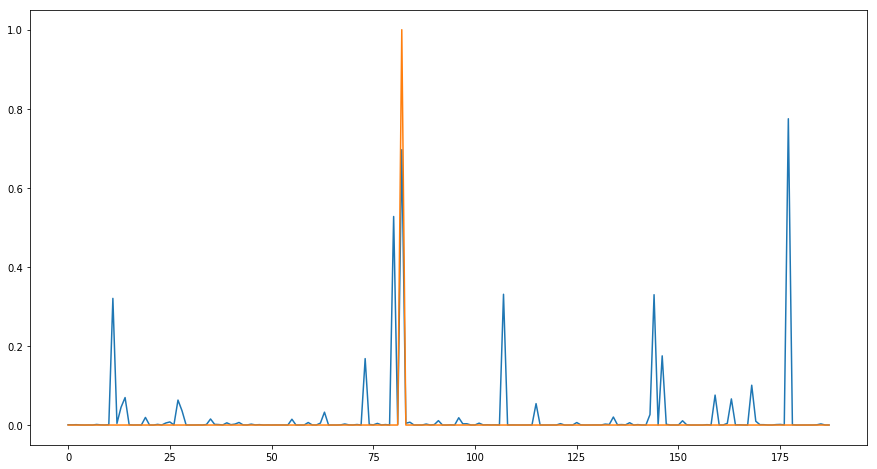

In [16]:
plt.figure(figsize=(15,8))
plt.plot(preds[song_i])
plt.plot(Y_test[song_i])

In [17]:
ann_tags = np.argwhere(df.iloc[song_i+21000].tolist()).flatten()
df.columns[ann_tags]

Index(['opera'], dtype='object')

In [18]:
pred_tags = np.argwhere(preds[song_i] > 0.25).flatten()
df.columns[pred_tags]

Index(['chorus', 'choral', 'opera', 'chant', 'male', 'choir'], dtype='object')

In [19]:
from __future__ import division, print_function

__author__ = "Marcos Duarte, https://github.com/demotu/BMC"
__version__ = "1.0.4"
__license__ = "MIT"


def detect_peaks(x, mph=None, mpd=1, threshold=0, edge='rising',
                 kpsh=False, valley=False, show=False, ax=None):

    """Detect peaks in data based on their amplitude and other features.

    Parameters
    ----------
    x : 1D array_like
        data.
    mph : {None, number}, optional (default = None)
        detect peaks that are greater than minimum peak height.
    mpd : positive integer, optional (default = 1)
        detect peaks that are at least separated by minimum peak distance (in
        number of data).
    threshold : positive number, optional (default = 0)
        detect peaks (valleys) that are greater (smaller) than `threshold`
        in relation to their immediate neighbors.
    edge : {None, 'rising', 'falling', 'both'}, optional (default = 'rising')
        for a flat peak, keep only the rising edge ('rising'), only the
        falling edge ('falling'), both edges ('both'), or don't detect a
        flat peak (None).
    kpsh : bool, optional (default = False)
        keep peaks with same height even if they are closer than `mpd`.
    valley : bool, optional (default = False)
        if True (1), detect valleys (local minima) instead of peaks.
    show : bool, optional (default = False)
        if True (1), plot data in matplotlib figure.
    ax : a matplotlib.axes.Axes instance, optional (default = None).

    Returns
    -------
    ind : 1D array_like
        indeces of the peaks in `x`.

    Notes
    -----
    The detection of valleys instead of peaks is performed internally by simply
    negating the data: `ind_valleys = detect_peaks(-x)`
    
    The function can handle NaN's 

    See this IPython Notebook [1]_.

    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb

    Examples
    --------
    >>> from detect_peaks import detect_peaks
    >>> x = np.random.randn(100)
    >>> x[60:81] = np.nan
    >>> # detect all peaks and plot data
    >>> ind = detect_peaks(x, show=True)
    >>> print(ind)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # set minimum peak height = 0 and minimum peak distance = 20
    >>> detect_peaks(x, mph=0, mpd=20, show=True)

    >>> x = [0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0]
    >>> # set minimum peak distance = 2
    >>> detect_peaks(x, mpd=2, show=True)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # detection of valleys instead of peaks
    >>> detect_peaks(x, mph=0, mpd=20, valley=True, show=True)

    >>> x = [0, 1, 1, 0, 1, 1, 0]
    >>> # detect both edges
    >>> detect_peaks(x, edge='both', show=True)

    >>> x = [-2, 1, -2, 2, 1, 1, 3, 0]
    >>> # set threshold = 2
    >>> detect_peaks(x, threshold = 2, show=True)
    """

    x = np.atleast_1d(x).astype('float64')
    if x.size < 3:
        return np.array([], dtype=int)
    if valley:
        x = -x
    # find indices of all peaks
    dx = x[1:] - x[:-1]
    # handle NaN's
    indnan = np.where(np.isnan(x))[0]
    if indnan.size:
        x[indnan] = np.inf
        dx[np.where(np.isnan(dx))[0]] = np.inf
    ine, ire, ife = np.array([[], [], []], dtype=int)
    if not edge:
        ine = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) > 0))[0]
    else:
        if edge.lower() in ['rising', 'both']:
            ire = np.where((np.hstack((dx, 0)) <= 0) & (np.hstack((0, dx)) > 0))[0]
        if edge.lower() in ['falling', 'both']:
            ife = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) >= 0))[0]
    ind = np.unique(np.hstack((ine, ire, ife)))
    # handle NaN's
    if ind.size and indnan.size:
        # NaN's and values close to NaN's cannot be peaks
        ind = ind[np.in1d(ind, np.unique(np.hstack((indnan, indnan-1, indnan+1))), invert=True)]
    # first and last values of x cannot be peaks
    if ind.size and ind[0] == 0:
        ind = ind[1:]
    if ind.size and ind[-1] == x.size-1:
        ind = ind[:-1]
    # remove peaks < minimum peak height
    if ind.size and mph is not None:
        ind = ind[x[ind] >= mph]
    # remove peaks - neighbors < threshold
    if ind.size and threshold > 0:
        dx = np.min(np.vstack([x[ind]-x[ind-1], x[ind]-x[ind+1]]), axis=0)
        ind = np.delete(ind, np.where(dx < threshold)[0])
    # detect small peaks closer than minimum peak distance
    if ind.size and mpd > 1:
        ind = ind[np.argsort(x[ind])][::-1]  # sort ind by peak height
        idel = np.zeros(ind.size, dtype=bool)
        for i in range(ind.size):
            if not idel[i]:
                # keep peaks with the same height if kpsh is True
                idel = idel | (ind >= ind[i] - mpd) & (ind <= ind[i] + mpd) \
                    & (x[ind[i]] > x[ind] if kpsh else True)
                idel[i] = 0  # Keep current peak
        # remove the small peaks and sort back the indices by their occurrence
        ind = np.sort(ind[~idel])

    if show:
        if indnan.size:
            x[indnan] = np.nan
        if valley:
            x = -x
        _plot(x, mph, mpd, threshold, edge, valley, ax, ind)

    return ind


def _plot(x, mph, mpd, threshold, edge, valley, ax, ind):
    """Plot results of the detect_peaks function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            _, ax = plt.subplots(1, 1, figsize=(8, 4))

        ax.plot(x, 'b', lw=1)
        if ind.size:
            label = 'valley' if valley else 'peak'
            label = label + 's' if ind.size > 1 else label
            ax.plot(ind, x[ind], '+', mfc=None, mec='r', mew=2, ms=8,
                    label='%d %s' % (ind.size, label))
            ax.legend(loc='best', framealpha=.5, numpoints=1)
        ax.set_xlim(-.02*x.size, x.size*1.02-1)
        ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
        yrange = ymax - ymin if ymax > ymin else 1
        ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
        ax.set_xlabel('Data #', fontsize=14)
        ax.set_ylabel('Amplitude', fontsize=14)
        mode = 'Valley detection' if valley else 'Peak detection'
        ax.set_title("%s (mph=%s, mpd=%d, threshold=%s, edge='%s')"
                     % (mode, str(mph), mpd, str(threshold), edge))
        # plt.grid()
        plt.show()